In [132]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

import cv2
import tensorflow, keras 
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model

In [133]:
pathAngry = "Angry"
pathSad = "Sad"

In [134]:
def read_show_image(folder_path,row,col):    
    images =[f for f in os.listdir(folder_path) if f.lower().endswith('.jpg')]
    num_of_images=30
    images_files = images[:num_of_images]    
    fig,axes= plt.subplots(row,col,figsize=(12,6))
    for i,ax in enumerate(axes.flat):
        if i<len(images_files):
            image_path = os.path.join(folder_path, images[i])
            image = cv2.imread(image_path)
            ax.imshow(image)
            ax.axis('off')
        
    plt.tight_layout()
    plt.show() 

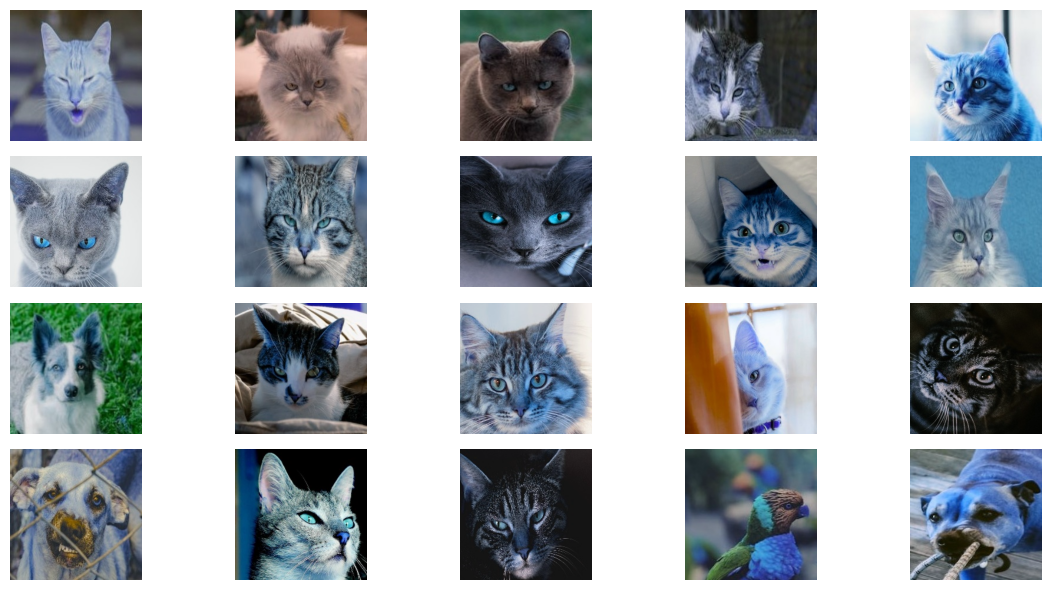

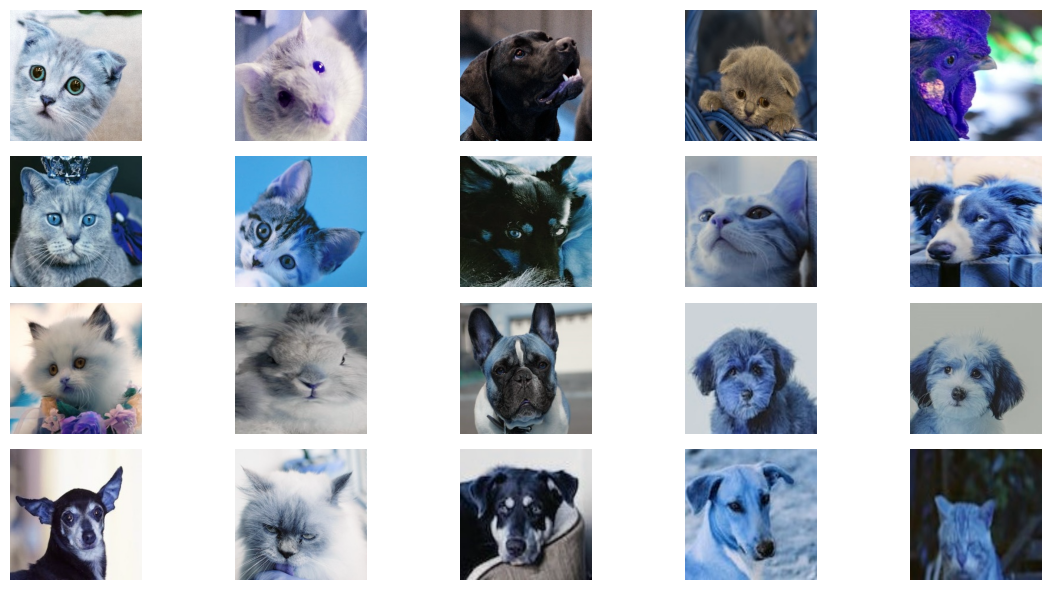

(None, None)

In [135]:
read_show_image(pathAngry, 4,5), read_show_image(pathSad, 4,5)

In [136]:
train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1/255)

In [137]:
batch_size = 32

train_generator = train_datagen.flow_from_directory(
    "Master Folder/train/",
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    'Master Folder/test/',
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1000 images belonging to 4 classes.
Found 38 images belonging to 4 classes.


In [138]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(4, activation='softmax')
])

In [139]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
epochs = 10 

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

Epoch 1/10
17/31 [===============>..............] - ETA: 11s - loss: 1.6116 - accuracy: 0.2404

In [ ]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('\nTest accuracy:', test_acc)

In [ ]:
model.save('image_classification_model.h5')
print("Model saved.")

In [ ]:
def predict_and_show_image_class(image_path):
    loaded_model = model
    
    new_image = image.load_img(image_path, target_size=(150, 150))
    new_image_array = image.img_to_array(new_image)
    new_image_array = np.expand_dims(new_image_array, axis=0)
    new_image_array /= 255.0  # Normalize pixel values
    
    predictions = loaded_model.predict(new_image_array)
    
    predicted_class_index = np.argmax(predictions)
    class_labels = ['angry', 'sad', 'happy', 'other']
    predicted_class = class_labels[predicted_class_index]
    
    plt.imshow(new_image)
    plt.title("Predicted class: " + predicted_class)
    plt.axis('off')  # Turn off axis labels
    plt.show()

angry_folder_path = 'Other' 
angry_images = [f for f in os.listdir(angry_folder_path) if f.lower().endswith('.jpg')]

selected_images = random.sample(angry_images, 4)

for image_filename in selected_images:
    image_path = os.path.join(angry_folder_path, image_filename)
    predict_and_show_image_class(image_path)